# Loteca Football Stats Análise de Dados 3 - FootData UK

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
%matplotlib inline

### Ler arquivo

In [2]:
#df = pd.read_csv("Loteca/D1 (2).csv",skiprows=2)

In [3]:
path =r'C:\Users\FFERRI\Documents\Desenvolvimento\Python\Predctions\footystats.org\Loteca' # use your path
allFiles = glob.glob(path + "/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

df = pd.concat(list_, axis = 0, ignore_index = True, sort=False)

In [4]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


# Análise de Dados 

### Frequencia de vitórias em casa (H), empates (D) e visitantes (A)

In [5]:
df['Res'] = 0

In [6]:
# Trata Resulstado
res_map = {'H' : 1, 'D' : 0, 'A' : -1}

In [7]:
# Aplicando o mapeamento ao dataset
df['Res'] = df['FTR'].map(res_map)

<BarContainer object of 3 artists>

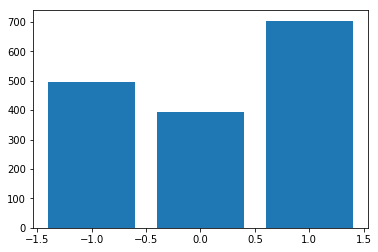

In [8]:
plt.bar(df['Res'].value_counts().keys(),df['Res'].value_counts())

In [9]:
# Vitórias
df[df['Res']==1].groupby(['Div','HomeTeam'])['FTHG'].count().sort_values(ascending=False)


Div  HomeTeam   
E0   Man City       24
SP1  Barcelona      21
E0   Arsenal        20
     Liverpool      18
     Man United     18
SP1  Real Madrid    17
E0   Tottenham      17
SP1  Ath Madrid     17
     Sevilla        16
E0   Chelsea        16
I1   Juventus       16
E0   Everton        15
SP1  Valencia       14
I1   Napoli         14
SP1  Espanol        13
     Alaves         13
     Betis          13
I1   Sampdoria      12
SP1  Villarreal     12
     Eibar          12
     Getafe         12
     Leganes        12
     Celta          11
E0   Bournemouth    11
     Brighton       11
SP1  Sociedad       11
I1   Roma           11
     Inter          11
E0   Watford        11
     West Ham       10
                    ..
I1   Spal            5
F1   Marseille       5
     Lyon            5
I1   Verona          5
     Benevento       5
E0   Stoke           5
SP1  Las Palmas      4
I1   Sassuolo        4
SP1  La Coruna       4
E0   Southampton     4
SP1  Malaga          4
F1   Montpellier 

In [10]:
# Vitórias
df[df['Res']==1].groupby(['Div','HomeTeam'])['FTHG'].count().sort_values(ascending=False)

Div  HomeTeam   
E0   Man City       24
SP1  Barcelona      21
E0   Arsenal        20
     Liverpool      18
     Man United     18
SP1  Real Madrid    17
E0   Tottenham      17
SP1  Ath Madrid     17
     Sevilla        16
E0   Chelsea        16
I1   Juventus       16
E0   Everton        15
SP1  Valencia       14
I1   Napoli         14
SP1  Espanol        13
     Alaves         13
     Betis          13
I1   Sampdoria      12
SP1  Villarreal     12
     Eibar          12
     Getafe         12
     Leganes        12
     Celta          11
E0   Bournemouth    11
     Brighton       11
SP1  Sociedad       11
I1   Roma           11
     Inter          11
E0   Watford        11
     West Ham       10
                    ..
I1   Spal            5
F1   Marseille       5
     Lyon            5
I1   Verona          5
     Benevento       5
E0   Stoke           5
SP1  Las Palmas      4
I1   Sassuolo        4
SP1  La Coruna       4
E0   Southampton     4
SP1  Malaga          4
F1   Montpellier 

In [11]:
# Empátes
df[df['Res']==0].groupby(['Div','HomeTeam'])['FTHG'].count().sort_values(ascending=False)

Div  HomeTeam      
SP1  Ath Bilbao        12
E0   Southampton       12
SP1  Celta             11
E0   Brighton          10
     West Brom          9
     Liverpool          8
     Leicester          8
SP1  Ath Madrid         8
I1   Spal               8
SP1  Valencia           8
E0   Huddersfield       7
SP1  Levante            7
E0   Crystal Palace     7
     Chelsea            7
     West Ham           7
     Bournemouth        7
I1   Sassuolo           7
E0   Everton            6
I1   Torino             6
E0   Watford            6
     Burnley            6
I1   Chievo             6
     Crotone            6
SP1  Villarreal         6
I1   Atalanta           6
SP1  Espanol            6
     Girona             6
     Leganes            6
     La Coruna          6
     Sevilla            6
                       ..
F1   Angers             3
     Bordeaux           3
     Strasbourg         3
SP1  Malaga             3
F1   Guingamp           3
SP1  Vallecano          3
F1   Monaco       

In [12]:
# Derrotas
df[df['Res']==-1].groupby(['Div','HomeTeam'])['FTHG'].count().sort_values(ascending=False)

Div  HomeTeam      
E0   Newcastle         13
I1   Verona            13
E0   Huddersfield      13
SP1  Las Palmas        13
I1   Benevento         12
E0   Burnley           12
SP1  Malaga            12
I1   Udinese           11
SP1  Girona            11
E0   Crystal Palace    11
     Swansea           10
     Watford           10
I1   Cagliari          10
E0   West Ham          10
I1   Genoa             10
E0   Southampton       10
     Stoke              9
SP1  Eibar              9
     Getafe             9
I1   Bologna            9
SP1  Alaves             9
     La Coruna          9
E0   Bournemouth        9
SP1  Levante            9
E0   Leicester          8
I1   Sassuolo           8
SP1  Villarreal         8
     Sociedad           8
I1   Crotone            7
E0   West Brom          7
                       ..
     Tottenham          4
F1   Guingamp           4
I1   Atalanta           4
F1   Nice               4
SP1  Vallecano          4
I1   Milan              4
E0   Man United   

In [13]:
# Vitprias Fora
df[df['Res']==1].groupby(['Div','AwayTeam'])['FTHG'].count().sort_values(ascending=False)

Div  AwayTeam      
SP1  Leganes           18
E0   Brighton          17
I1   Benevento         17
E0   Watford           16
SP1  Alaves            16
     Malaga            16
E0   Huddersfield      15
SP1  Celta             15
E0   Southampton       14
I1   Crotone           14
     Verona            14
E0   Crystal Palace    14
SP1  Sociedad          14
     Las Palmas        13
E0   Newcastle         13
     Everton           13
SP1  Sevilla           13
E0   West Ham          13
SP1  Ath Bilbao        13
E0   Bournemouth       13
I1   Bologna           12
     Sampdoria         12
E0   West Brom         12
     Arsenal           12
SP1  Eibar             12
     Betis             12
     Espanol           12
E0   Leicester         12
SP1  La Coruna         12
I1   Chievo            12
                       ..
F1   Marseille          5
E0   Liverpool          5
SP1  Ath Madrid         5
I1   Torino             5
F1   Monaco             4
     Lille              4
     Nantes       

In [14]:
# Derrtas Fora
#df[df['Res']==-1].groupby(['Div','AwayTeam'])['FTHG'].count().sort_values(ascending=False)

In [15]:
# Empates 
# Vitprias Fora
# df[df['Res']==0].groupby(['Div','AwayTeam'])['FTHG'].count().sort_values(ascending=False)

In [16]:
# Contar Vitórioas, Empates e Derrotas 
# quick look at all results
df.groupby('Res')['Res'].count()


Res
-1    494
 0    392
 1    704
Name: Res, dtype: int64

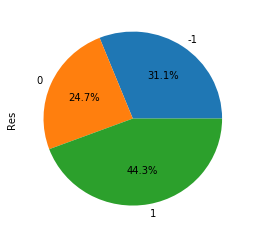

In [17]:
# Mandatory ugly pie chart, outcome split
df.groupby('Res')['Res'].count().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))

In [18]:
# How many local and visitor wins per season added as new columns
#df['home_wins_this_season'] = df.groupby(['home_team_name'])['local'].transform('sum')
#df['away_wins_this_season'] = df.groupby(['away_team_name'])['visitor'].transform('sum')

In [19]:
#https://www.kaggle.com/jonathonv/football-matches-data-analysis

df_wins = df

df_wins = df_wins[["Div","HomeTeam","AwayTeam","FTHG","FTAG"]]


local_results = (df_wins
                 .groupby(['Div','HomeTeam'])
                 .sum()
                 .reset_index()
                 .rename(columns={'HomeTeam': 'team',
                                  'FTHG': 'local_wins'}))

visitor_results = (df_wins
                   .groupby(['Div','AwayTeam'])
                   .sum()
                   .reset_index()
                   .rename(columns={'AwayTeam': 'team',
                                    'FTAG': 'visitor_wins'}))



wins_per_season = visitor_results.merge(local_results, on=['team'])

wins_per_season['total_wins'] = wins_per_season['visitor_wins'] + wins_per_season['local_wins']

wins_per_season = wins_per_season.sort_values('total_wins', ascending=False)


#wins_per_season.head(20)

wins_per_season


,Div_x,team,FTHG,visitor_wins,Div_y,local_wins,FTAG,total_wins
12,E0,Man City,15,60,E0,91,19,151
66,SP1,Barcelona,25,55,SP1,81,23,136
79,SP1,Real Madrid,40,50,SP1,66,23,116
11,E0,Liverpool,33,54,E0,60,11,114
0,E0,Arsenal,43,38,E0,70,28,108
18,E0,Tottenham,30,51,E0,51,22,102
5,E0,Chelsea,28,46,E0,47,23,93
13,E0,Man United,34,44,E0,48,19,92
53,I1,Lazio,28,44,I1,45,21,89
52,I1,Juventus,16,41,I1,45,8,86


In [20]:
# Somatório por Vitórias Home e Away

In [21]:
df_wins_shots = df


ddf_wins_shots = df_wins_shots[["Div","HomeTeam","AwayTeam","HST","AST"]]


local_results_shots = (ddf_wins_shots
                 .groupby(['Div','HomeTeam'])
                 .sum()
                 .reset_index()
                 .rename(columns={'HomeTeam': 'team',
                                  'HST': 'local_shots'}))

visitor_results_shots = (ddf_wins_shots
                   .groupby(['Div','AwayTeam'])
                   .sum()
                   .reset_index()
                   .rename(columns={'AwayTeam': 'team',
                                    'AST': 'visitor_shots'}))



wins_shots_per_season = visitor_results_shots.merge(local_results_shots, on=['team'])

wins_shots_per_season['total_wins_shots'] = wins_shots_per_season['visitor_shots'] + wins_shots_per_season['local_shots']

# Pode ordenar mais de um campo

wins_shots_per_season = wins_shots_per_season.sort_values('total_wins_shots',ascending=False)

#wins_shots_per_season.head(20)

wins_shots_per_season


,Div_x,team,HST,visitor_shots,Div_y,local_shots,AST,total_wins_shots
12,E0,Man City,65,155,E0,219,55,374
66,SP1,Barcelona,101,160,SP1,212,90,372
79,SP1,Real Madrid,117,155,SP1,205,86,360
11,E0,Liverpool,92,149,E0,174,51,323
0,E0,Arsenal,114,123,E0,186,109,309
5,E0,Chelsea,91,120,E0,185,77,305
18,E0,Tottenham,105,140,E0,159,94,299
13,E0,Man United,118,128,E0,142,102,270
80,SP1,Sevilla,111,118,SP1,138,107,256
55,I1,Napoli,52,114,I1,142,46,256


In [22]:
#wins_per_season['team'].['total_wins'].sort_values(ascending=False)

In [23]:
total_wins_sorted_desc = (wins_per_season
                          .groupby(['team'])['total_wins']
                          .sum()
                          .sort_values(ascending=False)
                          .reset_index()['team'])
# no exemplo faltou columns='season',
wins_per_season_pivot = (wins_per_season
                         .pivot_table(index='team',
                                      values='total_wins')
                         .fillna(0)
                         .reindex(total_wins_sorted_desc))

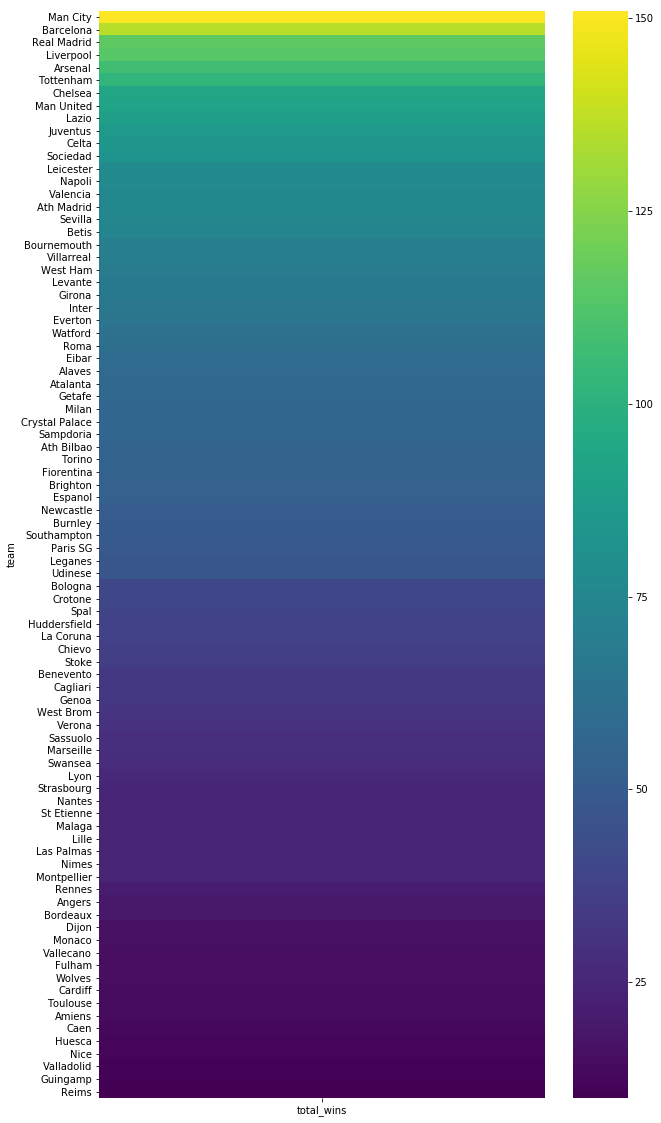

In [24]:
# Look at total wins per season over time
plt.figure(figsize=(10, 20))
sns.heatmap(wins_per_season_pivot, cmap='viridis')

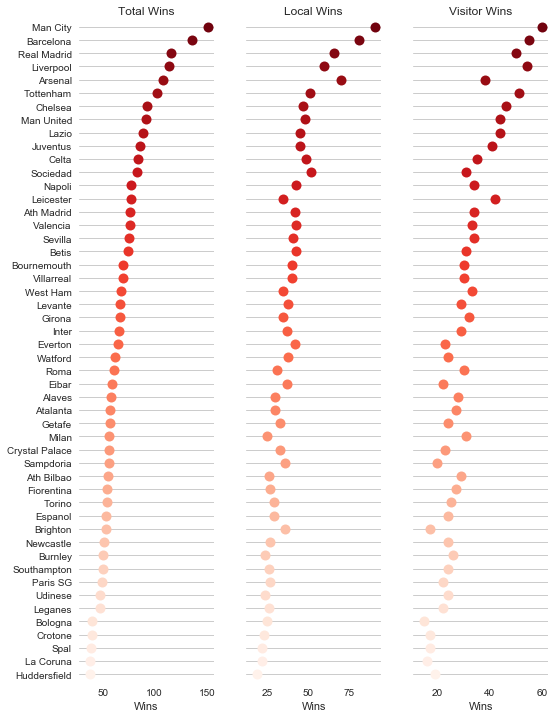

In [25]:
# Which wins contributed to the total wins
sns.set(style="whitegrid")

# Rearrange data
top_50 = wins_per_season[wins_per_season['team'].isin(total_wins_sorted_desc[:50])]
wps = top_50[['team','total_wins','local_wins','visitor_wins']]
wps = wps.groupby(['team'])['total_wins','local_wins','visitor_wins'].sum().reset_index()

# Make the PairGrid
g = sns.PairGrid(wps.sort_values("total_wins", ascending=False),
                 x_vars=wps.columns[1:], y_vars=["team"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Wins", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total Wins", "Local Wins", "Visitor Wins"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

Total Home and Away Goals

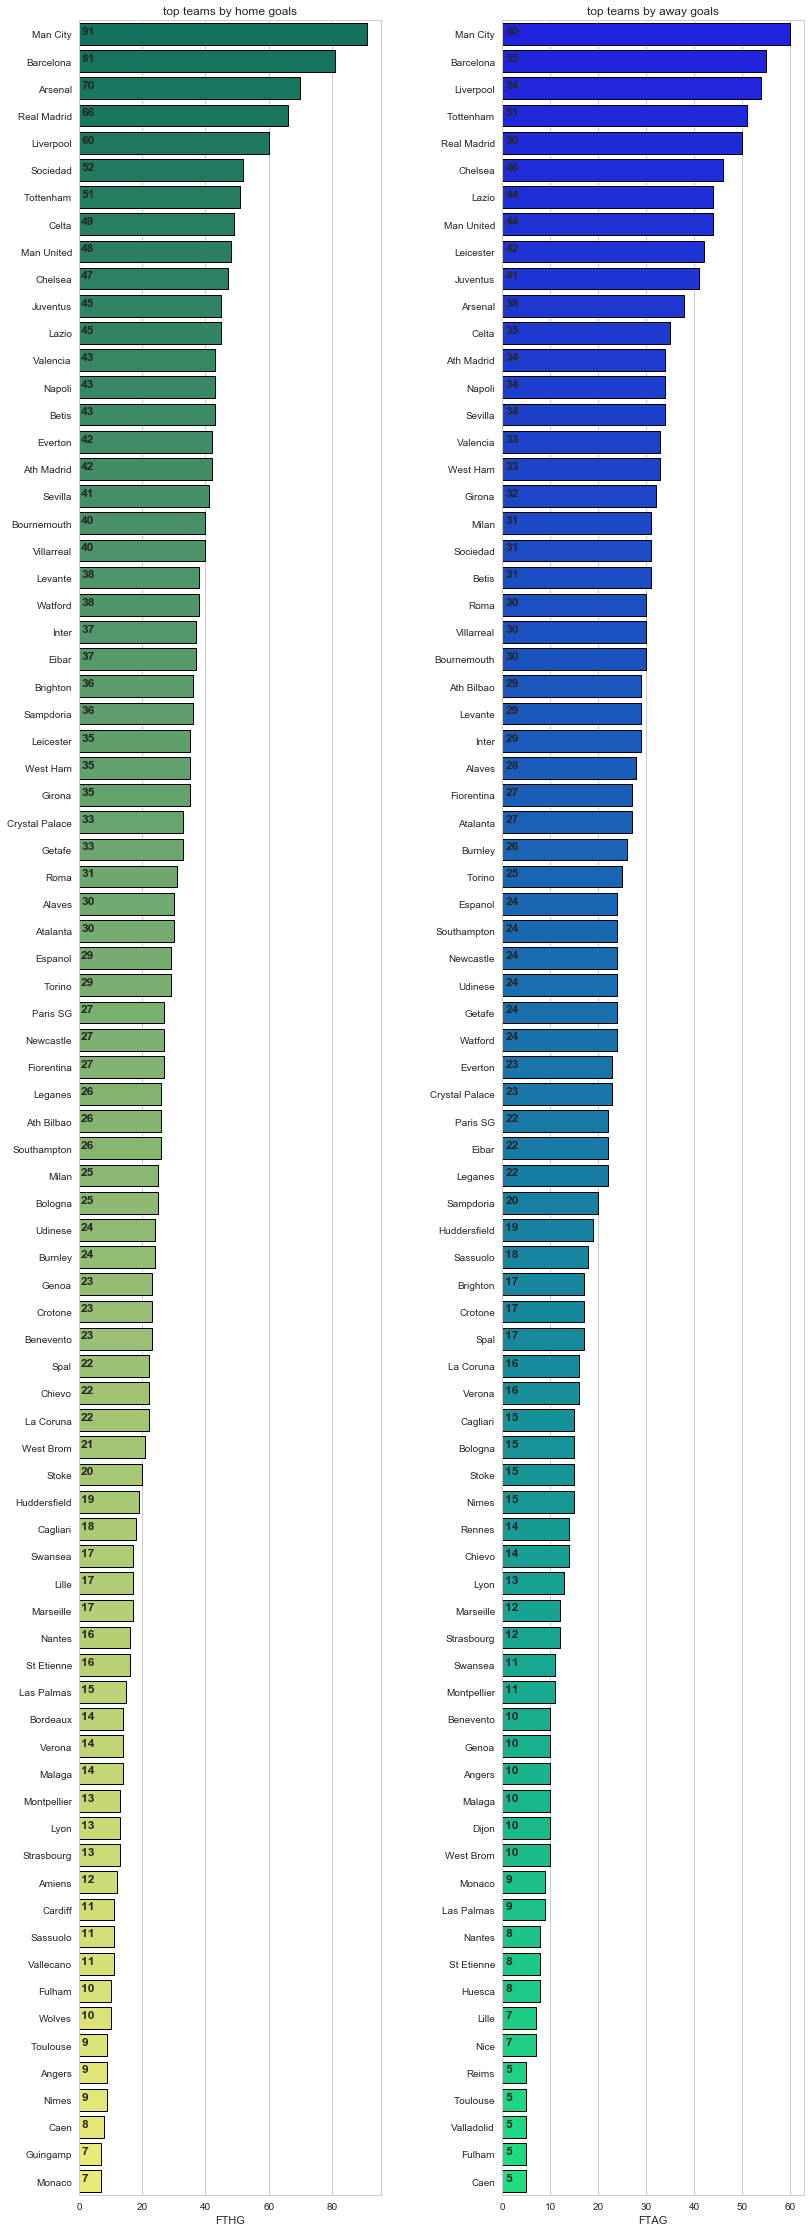

In [26]:
# https://www.kaggle.com/pavanraj159/european-football-data-analysis
h_t = df.groupby("HomeTeam")["FTHG"].sum().reset_index()
a_t = df.groupby("AwayTeam")["FTAG"].sum().reset_index()
h_t = h_t.sort_values(by="FTHG",ascending= False)
a_t = a_t.sort_values(by="FTAG",ascending= False)
plt.figure(figsize=(13,40))
plt.subplot(121)
ax = sns.barplot(y="HomeTeam",x="FTHG",
                 data=h_t[:80],palette="summer",
                 linewidth = 1,edgecolor = "k"*80)
plt.ylabel('')
plt.title("top teams by home goals")
for i,j in enumerate(h_t["FTHG"][:80]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="AwayTeam",x="FTAG",
                 data=a_t[:80],palette="winter",
                linewidth = 1,edgecolor = "k"*80)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")
for i,j in enumerate(a_t["FTAG"][:80]):
    ax.text(.7,i,j,weight = "bold")

Shots por Home e Away

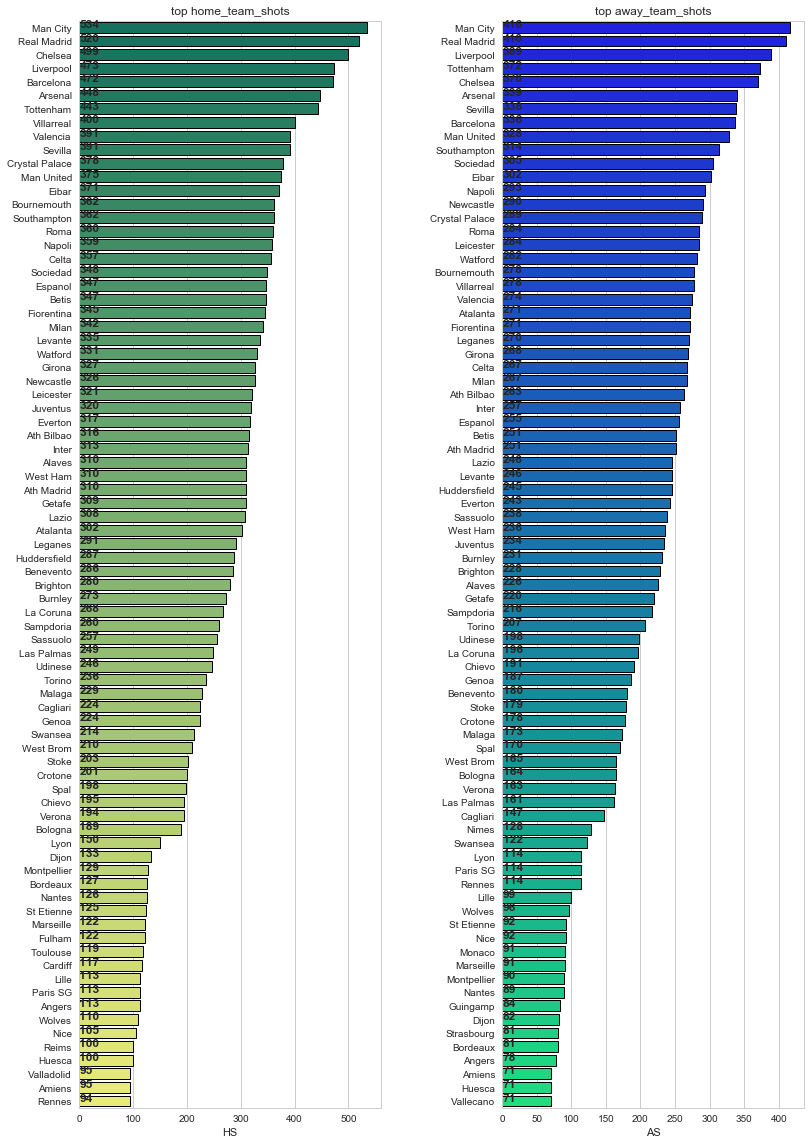

In [27]:
# https://www.kaggle.com/pavanraj159/european-football-data-analysis
h_t = df.groupby("HomeTeam")["HS"].sum().reset_index()
a_t = df.groupby("AwayTeam")["AS"].sum().reset_index()
h_t = h_t.sort_values(by="HS",ascending= False)
a_t = a_t.sort_values(by="AS",ascending= False)
plt.figure(figsize=(13,20))
plt.subplot(121)
ax = sns.barplot(y="HomeTeam",x="HS",
                 data=h_t[:80],palette="summer",
                 linewidth = 1,edgecolor = "k"*80)
plt.ylabel('')
plt.title("top home_team_shots")
for i,j in enumerate(h_t["HS"][:80]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="AwayTeam",x="AS",
                 data=a_t[:80],palette="winter",
                linewidth = 1,edgecolor = "k"*80)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top away_team_shots")
for i,j in enumerate(a_t["AS"][:80]):
    ax.text(.7,i,j,weight = "bold")

Shots on Target por Home e Away

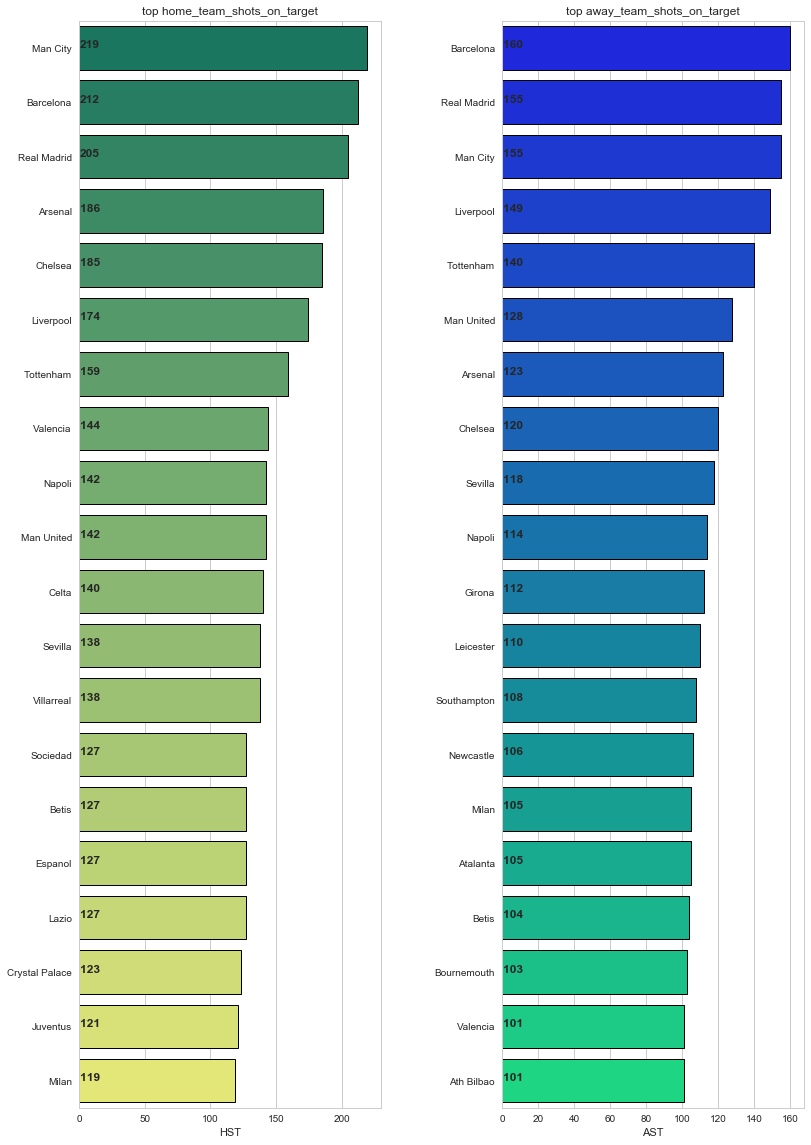

In [28]:
h_t = df.groupby("HomeTeam")["HST"].sum().reset_index()
a_t = df.groupby("AwayTeam")["AST"].sum().reset_index()
h_t = h_t.sort_values(by="HST",ascending= False)
a_t = a_t.sort_values(by="AST",ascending= False)
plt.figure(figsize=(13,20))
plt.subplot(121)
ax = sns.barplot(y="HomeTeam",x="HST",
                 data=h_t[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("top home_team_shots_on_target")
for i,j in enumerate(h_t["HST"][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="AwayTeam",x="AST",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top away_team_shots_on_target")
for i,j in enumerate(a_t["AST"][:20]):
    ax.text(.7,i,j,weight = "bold")

Home and Away Time Fouls ( Faltas ) 

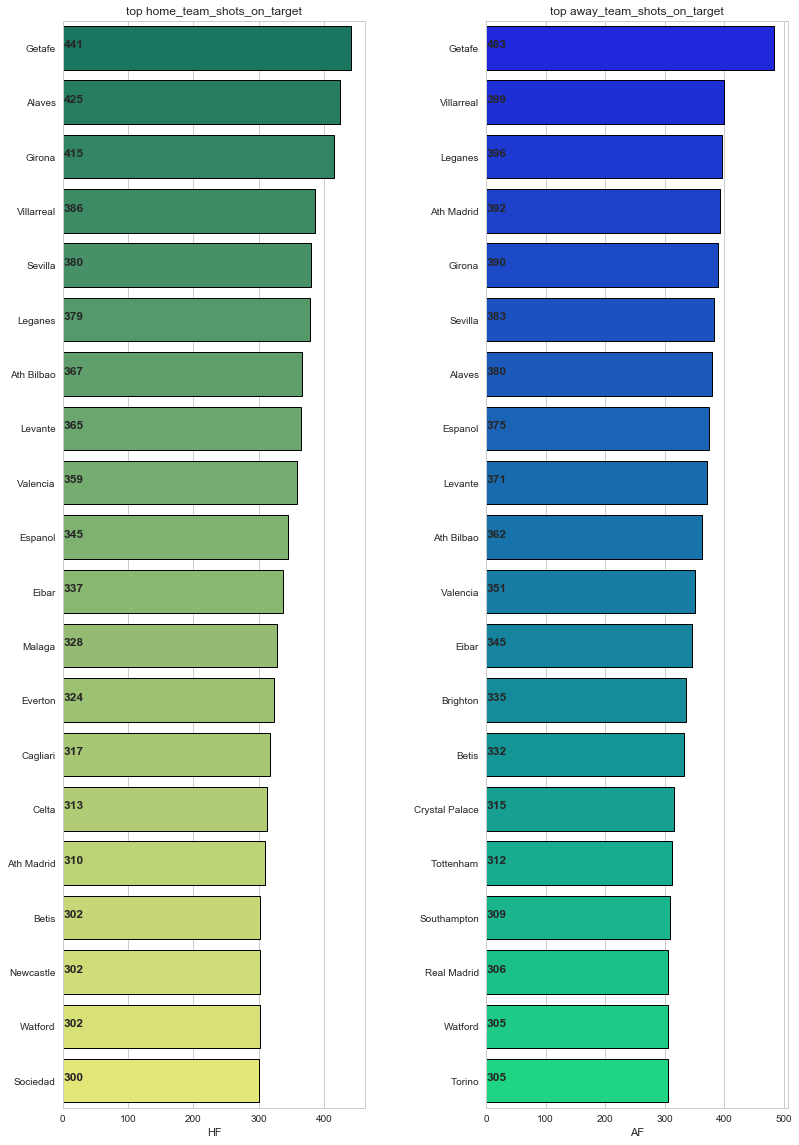

In [29]:
h_t = df.groupby("HomeTeam")["HF"].sum().reset_index()
a_t = df.groupby("AwayTeam")["AF"].sum().reset_index()
h_t = h_t.sort_values(by="HF",ascending= False)
a_t = a_t.sort_values(by="AF",ascending= False)
plt.figure(figsize=(13,20))
plt.subplot(121)
ax = sns.barplot(y="HomeTeam",x="HF",
                 data=h_t[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("top home_team_shots_on_target")
for i,j in enumerate(h_t["HF"][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="AwayTeam",x="AF",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top away_team_shots_on_target")
for i,j in enumerate(a_t["AF"][:20]):
    ax.text(.7,i,j,weight = "bold")

Home and Away Time PPP - Pontos por Jogos

In [30]:
#h_t = df.groupby("home_team_name")["home_ppg"].sum().reset_index()
#a_t = df.groupby("away_team_name")["away_ppg"].sum().reset_index()
#h_t = h_t.sort_values(by="home_ppg",ascending= False)
#a_t = a_t.sort_values(by="away_ppg",ascending= False)
#plt.figure(figsize=(13,10))
#plt.subplot(121)
#ax = sns.barplot(y="home_team_name",x="home_ppg",
#                 data=h_t[:20],palette="summer",
#                 linewidth = 1,edgecolor = "k"*20)
#plt.ylabel('')
#plt.title("top home Pontos por Jogos")
#for i,j in enumerate(h_t["home_ppg"][:20]):
#    ax.text(.7,i,j,weight = "bold")
#plt.subplot(122)
#ax = sns.barplot(y="away_team_name",x="away_ppg",
#                 data=a_t[:20],palette="winter",
#                linewidth = 1,edgecolor = "k"*20)
#plt.ylabel("")
#plt.subplots_adjust(wspace = .4)
#plt.title("top away Pontos por Jogos ")
#for i,j in enumerate(a_t["away_ppg"][:20]):
#    ax.text(.7,i,j,weight = "bold")

Total Home and Away Corner

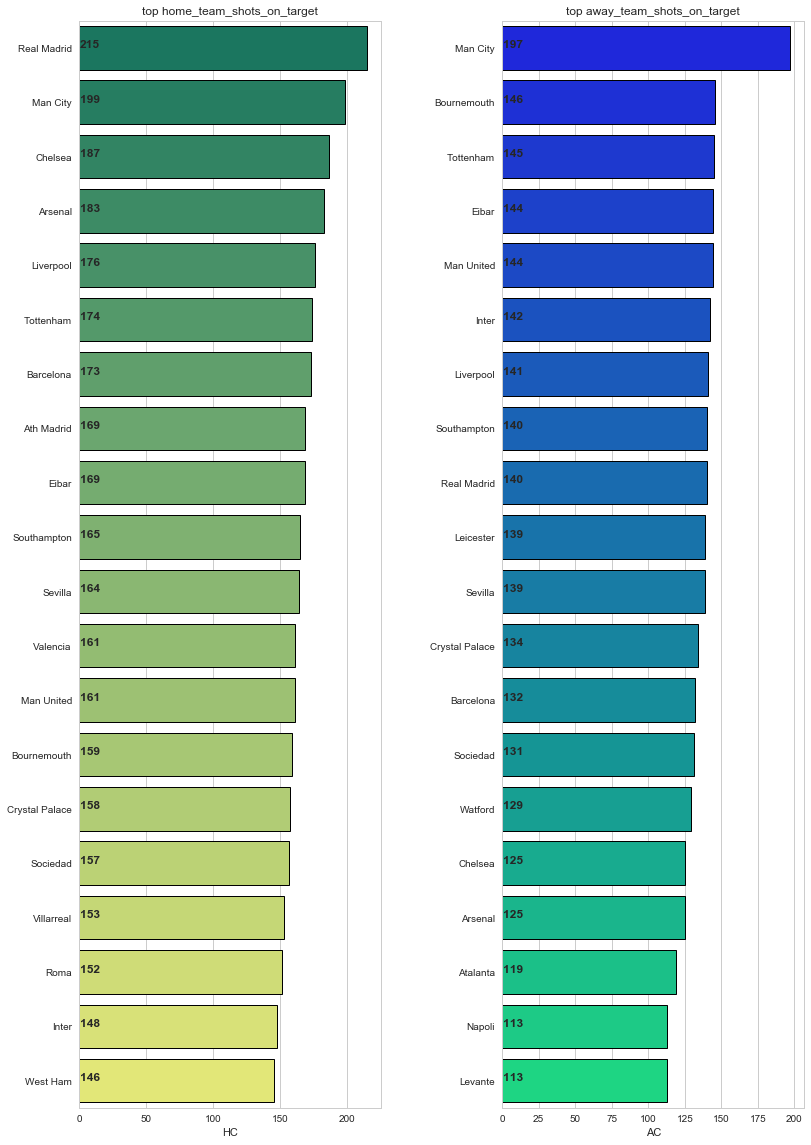

In [31]:
h_t = df.groupby("HomeTeam")["HC"].sum().reset_index()
a_t = df.groupby("AwayTeam")["AC"].sum().reset_index()
h_t = h_t.sort_values(by="HC",ascending= False)
a_t = a_t.sort_values(by="AC",ascending= False)
plt.figure(figsize=(13,20))
plt.subplot(121)
ax = sns.barplot(y="HomeTeam",x="HC",
                 data=h_t[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("top home_team_shots_on_target")
for i,j in enumerate(h_t["HC"][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="AwayTeam",x="AC",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top away_team_shots_on_target")
for i,j in enumerate(a_t["AC"][:20]):
    ax.text(.7,i,j,weight = "bold")

# Tratamento de Dados

In [32]:
# Tratar Data
#df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d")

In [33]:
# Define os campos a serem utilizados
# df = df[["HomeTeam", "AwayTeam", "FTHG", "FTAG", "HST", "AST", "HC", "AC", "Res"]]
df = df[["HomeTeam","FTHG", "HST","HC", "AwayTeam", "FTAG", "AST", "AC", "Res"]]
df_full = df

In [34]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 9 columns):
HomeTeam    1590 non-null object
FTHG        1590 non-null int64
HST         1590 non-null int64
HC          1590 non-null int64
AwayTeam    1590 non-null object
FTAG        1590 non-null int64
AST         1590 non-null int64
AC          1590 non-null int64
Res         1590 non-null int64
dtypes: int64(7), object(2)
memory usage: 111.9+ KB


In [35]:
vocab = df['HomeTeam'].unique()

In [36]:
vocab

array(['Arsenal', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton',
       'Southampton', 'Watford', 'West Brom', 'Man United', 'Newcastle',
       'Bournemouth', 'Burnley', 'Leicester', 'Liverpool', 'Stoke',
       'Swansea', 'Huddersfield', 'Tottenham', 'Man City', 'West Ham',
       'Fulham', 'Wolves', 'Cardiff', 'Marseille', 'Angers', 'Lille',
       'Montpellier', 'Nantes', 'Nice', 'St Etienne', 'Bordeaux', 'Lyon',
       'Paris SG', 'Reims', 'Amiens', 'Caen', 'Dijon', 'Guingamp',
       'Monaco', 'Rennes', 'Nimes', 'Strasbourg', 'Toulouse', 'Juventus',
       'Verona', 'Atalanta', 'Bologna', 'Crotone', 'Inter', 'Lazio',
       'Sampdoria', 'Sassuolo', 'Udinese', 'Benevento', 'Genoa', 'Roma',
       'Chievo', 'Fiorentina', 'Milan', 'Napoli', 'Spal', 'Torino',
       'Cagliari', 'Leganes', 'Valencia', 'Celta', 'Girona', 'Sevilla',
       'Ath Bilbao', 'Barcelona', 'La Coruna', 'Levante', 'Malaga',
       'Betis', 'Sociedad', 'Alaves', 'Las Palmas', 'Eibar', 'Espanol',
       'Get

In [37]:
word2idx = {word: i for i, word in enumerate(vocab)}

In [38]:
word2idx

{'Arsenal': 0,
 'Brighton': 1,
 'Chelsea': 2,
 'Crystal Palace': 3,
 'Everton': 4,
 'Southampton': 5,
 'Watford': 6,
 'West Brom': 7,
 'Man United': 8,
 'Newcastle': 9,
 'Bournemouth': 10,
 'Burnley': 11,
 'Leicester': 12,
 'Liverpool': 13,
 'Stoke': 14,
 'Swansea': 15,
 'Huddersfield': 16,
 'Tottenham': 17,
 'Man City': 18,
 'West Ham': 19,
 'Fulham': 20,
 'Wolves': 21,
 'Cardiff': 22,
 'Marseille': 23,
 'Angers': 24,
 'Lille': 25,
 'Montpellier': 26,
 'Nantes': 27,
 'Nice': 28,
 'St Etienne': 29,
 'Bordeaux': 30,
 'Lyon': 31,
 'Paris SG': 32,
 'Reims': 33,
 'Amiens': 34,
 'Caen': 35,
 'Dijon': 36,
 'Guingamp': 37,
 'Monaco': 38,
 'Rennes': 39,
 'Nimes': 40,
 'Strasbourg': 41,
 'Toulouse': 42,
 'Juventus': 43,
 'Verona': 44,
 'Atalanta': 45,
 'Bologna': 46,
 'Crotone': 47,
 'Inter': 48,
 'Lazio': 49,
 'Sampdoria': 50,
 'Sassuolo': 51,
 'Udinese': 52,
 'Benevento': 53,
 'Genoa': 54,
 'Roma': 55,
 'Chievo': 56,
 'Fiorentina': 57,
 'Milan': 58,
 'Napoli': 59,
 'Spal': 60,
 'Torino': 61,


In [39]:
# Aplicando o mapeamento ao dataset
df['HomeTeam'] = df['HomeTeam'].map(word2idx)

C:\Users\FFERRI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
# Aplicando o mapeamento ao dataset
df['AwayTeam'] = df['AwayTeam'].map(word2idx)

C:\Users\FFERRI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
# split into input (X) and output (Y) variables

X=df.iloc[:,0:8].values
Y=df.iloc[:,8].values

X_full=df_full.iloc[:,0:8].values
Y_full=df_full.iloc[:,8].values

X=np.nan_to_num(X)
Y=np.nan_to_num(Y)

### Nomes dos times

In [42]:
X.shape

(1590, 8)

In [43]:
Y.shape

(1590,)

In [44]:
# Definindo a taxa de split
split_test_size = 0.30

In [45]:
# Criando dados de treino e de teste
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_test_size)

In [46]:
Y_test

array([ 1,  1,  1, -1,  0,  0, -1,  1,  1,  0,  1,  1,  0,  1,  1, -1, -1,
        1,  1, -1, -1,  0, -1,  1,  1, -1,  0,  0,  1,  0, -1,  1,  0,  1,
        0, -1,  1,  1,  1,  0,  1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  1,
        1, -1,  0,  1,  0, -1, -1,  1,  1, -1,  1,  0,  1,  0,  1, -1,  1,
        1,  0,  0, -1, -1,  1,  1,  1, -1,  1,  1,  0, -1, -1,  0,  1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  0, -1,
        1, -1, -1,  0,  0,  1,  1,  1,  1, -1,  1, -1,  0,  1,  1,  0,  0,
       -1,  0, -1, -1,  1,  1,  0,  1,  0,  1,  1, -1,  1, -1, -1, -1,  1,
       -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  1,  0, -1,  1, -1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1, -1,  0,  0, -1,  0,  0,
       -1, -1,  1,  1,  0,  1,  0,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  0,  0,  1,  1, -1,
       -1,  0,  0,  1,  0, -1, -1,  1,  0,  1,  1,  1, -1,  0, -1, -1,  0,
       -1, -1,  0,  1,  1

In [47]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_test)/len(df.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


# Criar o Modelo SVM - Support Vector Machine

In [48]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
modelSVM = SVR( C=15, epsilon=0.2, gamma="auto")
from sklearn.utils.validation import check_array


In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df = df[["HomeTeam","FTHG", "HST","HC", "AwayTeam", "FTAG", "AST", "AC", "Res"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 9 columns):
HomeTeam    1590 non-null int64
FTHG        1590 non-null int64
HST         1590 non-null int64
HC          1590 non-null int64
AwayTeam    1590 non-null int64
FTAG        1590 non-null int64
AST         1590 non-null int64
AC          1590 non-null int64
Res         1590 non-null int64
dtypes: int64(9)
memory usage: 111.9 KB


In [69]:
def get_time_mean(Time,local):
    
# Get Home 
    rows = np.size(X_full,0)
    cols = np.size(X_full,1) 
    X_Desc = []
    result = np.zeros(shape=(0,cols))
    
    result_array = []
    TimeXMean = []
    X_Desc_aux = X_full[::-1, ]
    X_Desc = np.asarray(X_Desc_aux) 
    cont = 0



    if (local=="Home"):
        for TimeX in range(len(X_Desc)):
            if (X_Desc[TimeX][0] == Time and cont <=9):                
                cont = cont + 1
                row = [X_Desc[TimeX][0],
                       X_Desc[TimeX][1], 
                       X_Desc[TimeX][2], 
                       X_Desc[TimeX][3]]         
                TimeXMean.append(row)
        
                
    if (local=="Away"):
        for TimeX in range(len(X_Desc)):
             if (X_Desc[TimeX][4] == Time and cont <=9):                
                cont = cont + 1
                row = [X_Desc[TimeX][4],
                       X_Desc[TimeX][5], 
                       X_Desc[TimeX][6], 
                       X_Desc[TimeX][7]]                                 
                TimeXMean.append(row)
        
            
    result = np.mean(TimeXMean, axis=0)
    
    return  result

In [70]:
modelSVM.fit(X_train, Y_train)

SVR(C=15, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [71]:
np.array(X_train).shape

(1113, 8)

In [72]:
np.array(X_train).reshape(-1, 1)

array([[19],
       [ 3],
       [ 5],
       ...,
       [ 1],
       [ 4],
       [ 0]], dtype=int64)

In [73]:
nb_predict_train = modelSVM.predict(X_train)

In [74]:
round_predict_values = np.rint(nb_predict_train)

In [75]:
error = np.mean( round_predict_values != Y_train )

In [76]:
accuracySVM = mean_absolute_percentage_error(round_predict_values,Y_train)

C:\Users\FFERRI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_train, round_predict_values)))
print()

Exatidão (Accuracy): 1.0000



In [78]:
res = []
for j in range(len(X_test)):
    r = modelSVM.predict([X_test[j]])
    res.append(round(r[0],0) - Y_test[j])
print(round((1 - abs(np.mean(res))) * 100,0), '%')

87.0 %


In [79]:
# Lista de Times Home

In [165]:
ApostasHome = { 
    'Espanol': 78,
    'Huesca': 85, 
    'Eibar': 77,
    'Guingamp': 37,  
    'Rennes': 39, 
    'Toulouse': 42,
    'St Etienne': 29, 
    'Newcastle': 9,
    'Leicester': 12, 
    'Sassuolo': 51,
    'Lazio': 49,
    'Milan': 58    
}

In [166]:
ApostasAway = {  
   'Barcelona': 69,
   'Real Madrid': 80,
   'Levante': 71,
   'Amiens': 34, 
   'Dijon': 36,
   'Lyon': 31,
   'Marseille': 23,
   'Wolves': 21,
   'Tottenham': 17,
   'Fiorentina': 57,
   'Sampdoria': 50,
   'Torino': 61
}

In [170]:
dfHome = pd.DataFrame(list(ApostasHome.items()), index=['2','3','4','5','6','7','8','9','10','11','12','14'])
dfHome.columns = ['Home', 'ID']

dfAway = pd.DataFrame(list(ApostasAway.items()), index=['2','3','4','5','6','7','8','9','10','11','12','14'])
dfAway.columns = ['Away', 'ID']

frames = [dfHome, dfAway]

dfJogos = pd.concat([dfHome, dfAway], axis=1, join='inner')

dfJogos

,Home,ID,Away,ID
2,Espanol,78,Barcelona,69
3,Huesca,85,Real Madrid,80
4,Eibar,77,Levante,71
5,Guingamp,37,Amiens,34
6,Rennes,39,Dijon,36
7,Toulouse,42,Lyon,31
8,St Etienne,29,Marseille,23
9,Newcastle,9,Wolves,21
10,Leicester,12,Tottenham,17
11,Sassuolo,51,Fiorentina,57


In [174]:
# For each row in the column,
results = []
for index, row in dfJogos.iterrows():
    print(row[1], row[3])
    XHome = get_time_mean(row[1],"Home")
    XAway = get_time_mean(row[3],"Away")
    ArrayAposta = np.concatenate([XHome, XAway])
    Aposta =np.array(ArrayAposta,dtype=object).reshape(1, -1)
    # Prever 
    JogoPred = modelSVM.predict(Aposta)
    print(row[1],row[3],JogoPred)
    JogoPred = np.rint(JogoPred)
    results.append(JogoPred)
    #dfJogos.loc[row, 'ResPred'] = JogoPred
#dfJogos[results] = results
#results = np.array(results).reshape(-1, 1)
results

#dfJogos[results] = results.toarray().tolist()


            

78 69
78 69 [0.00346572]
85 80
85 80 [0.02672719]
77 71
77 71 [-0.04348994]
37 34
37 34 [0.39891208]
39 36
39 36 [-0.03438798]
42 31
42 31 [-0.20403739]
29 23
29 23 [0.10289702]
9 21
9 21 [-0.02863342]
12 17
12 17 [-0.1764074]
51 57
51 57 [-0.20565046]
49 50
49 50 [0.23377137]
58 61
58 61 [0.13188318]


[array([0.]),
 array([0.]),
 array([-0.]),
 array([0.]),
 array([-0.]),
 array([-0.]),
 array([0.]),
 array([-0.]),
 array([-0.]),
 array([-0.]),
 array([0.]),
 array([0.])]

In [82]:
df_jogos

### Salvar o modelo

In [ ]:
#from sklearn.externals import joblib

In [ ]:
#joblib.dump(model, 'model.joblib')

In [ ]:
#model = joblib.load('model.joblib') 

### Realizar previsão